<a href="https://colab.research.google.com/github/ashisaxena710/BharatIntern/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wine Quality Prediction**

##***Machine Learning Model to predict the quality of wine.***

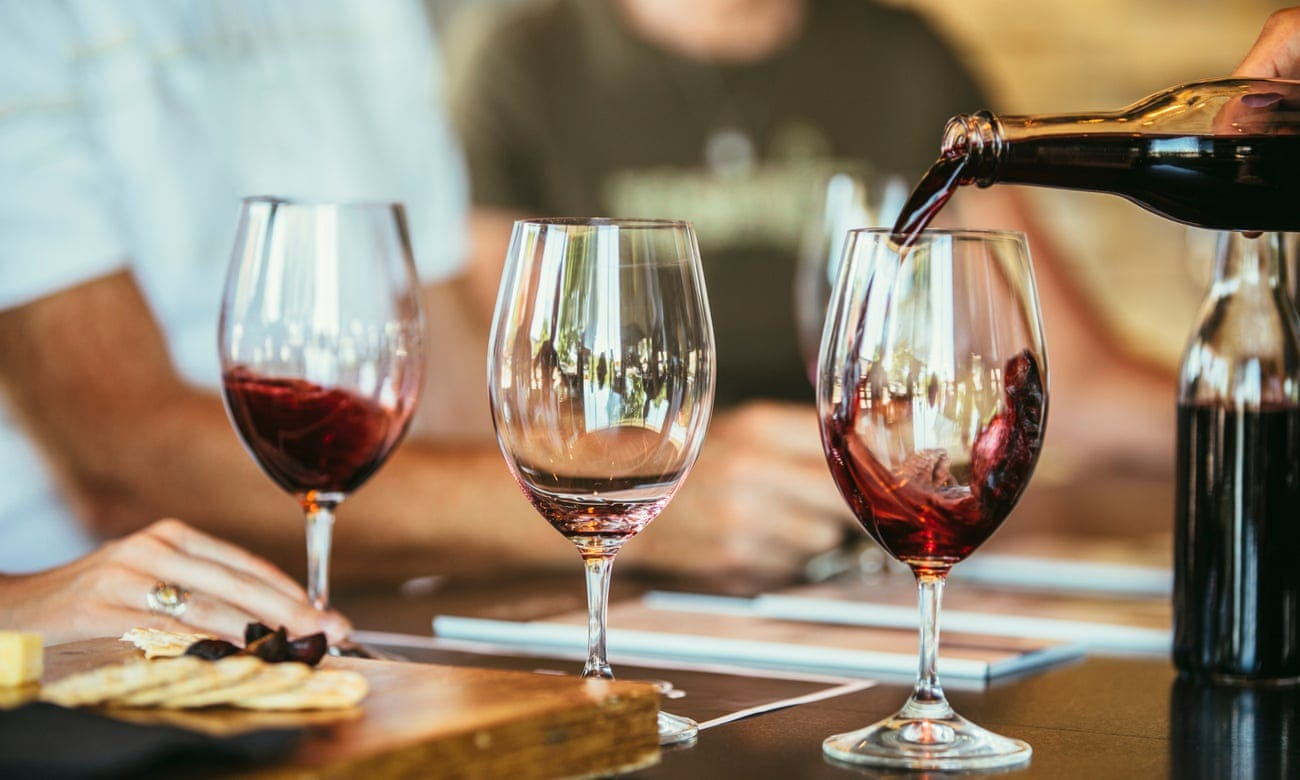

In [64]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [65]:
# Loading the dataset
df= pd.read_csv("/content/drive/MyDrive/Bharat Intern/Wine Quality Prediction/wine quality.csv")

In [66]:
# Let us see first few rows of the dataset
df.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

###Description of dataset

* **type** : Type of wine whether it is red-wine or white-wine.

* **fixed acidity** :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic

* **volatile acidity** :   Volatile acidity is the gaseous acids present in wine.

* **citric acid** :    It is weak organic acid, found in citrus fruits naturally.

* **residual sugar** :   Amount of sugar left after fermentation.

* **chlorides** :   Amount of salt present in wine.

* **free sulfur dioxide** :   So2 is used for prevention of wine by oxidation and microbial spoilage.

* **total sulfur dioxide**

* **density**

* **pH** :   In wine pH is used for checking acidity
density

* **sulphates** :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

* **alcohol** :   Percent of alcohol present in wine.

In [67]:
# Dataset rows and columns
print(f'The dataset contain {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contain 6497 rows and 13 columns.


In [68]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [69]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [70]:
# Missing values / Null Values Count
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

We see that there are not many null values present in the dataset so we simply fill them with fillna() function.

Let us impute the missing value by means as the data present in different columns contain continuous values.

In [71]:
# Impute missing values by means
df.update(df.fillna(df.mean()))

In [72]:
# Check the count of null values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [73]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.853333          0.517000     0.281000        5.140000   
4             7.288889          0.457963     0.272315        4.153704   
5             7.329085          0.389721     0.307726        5.804116   
6             7.178091          0.313767     0.323783        5.551144   
7             7.128962          0.288989     0.334764        4.734610   
8             6.840500          0.291010     0.332539        5.382902   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.077033            39.216667            122.033333  0.995744   
4         0.060139            20.636574            103.432870  0.994833   
5         0.064666            30.237371            120.839102  0.995849   
6         0.054169            31.165021            115.410790  0.994558   
7         0.045272            30.422150            108.498610  0.993126   
8         0.041124            34.533679            117.518135  0.992514   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.257667   0.506333  10.215000  
4        3.231620   0.505006  10.180093  
5        3.212051   0.526418   9.837783  
6        3.217702   0.532466  10.587553  
7        3.227773   0.547025  11.386006  
8        3.223212   0.512487  11.678756  
9        3.308000   0.466000  12.180000

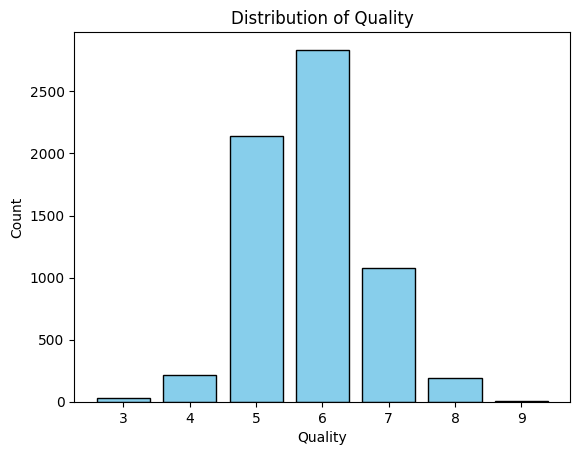

In [74]:
# Counting the occurrences of each quality value
quality_counts = df['quality'].value_counts()
unique_qualities = quality_counts.index

# Creating a bar chart
plt.bar(unique_qualities, quality_counts, color='skyblue',edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')
plt.show()

Next, we'll visualize the distribution of our dataset's features by creating histograms. This will give us insights into the distribution patterns, ranges, and frequencies of different variables.

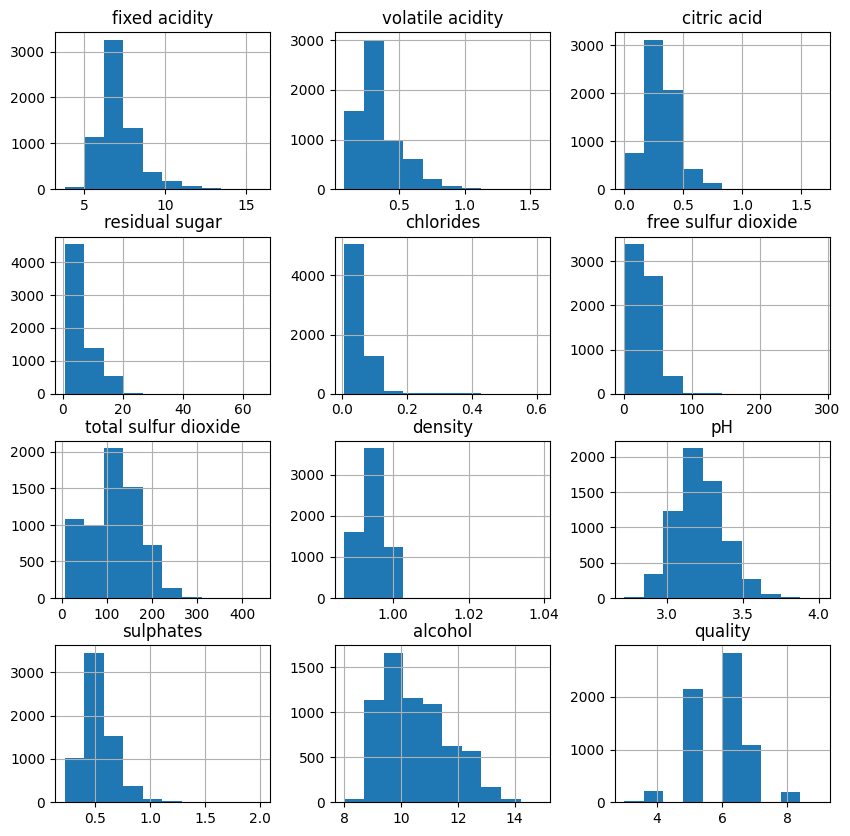

In [75]:
# Visualizing the distribution of features using histograms
df.hist(figsize=(10,10))
plt.show()

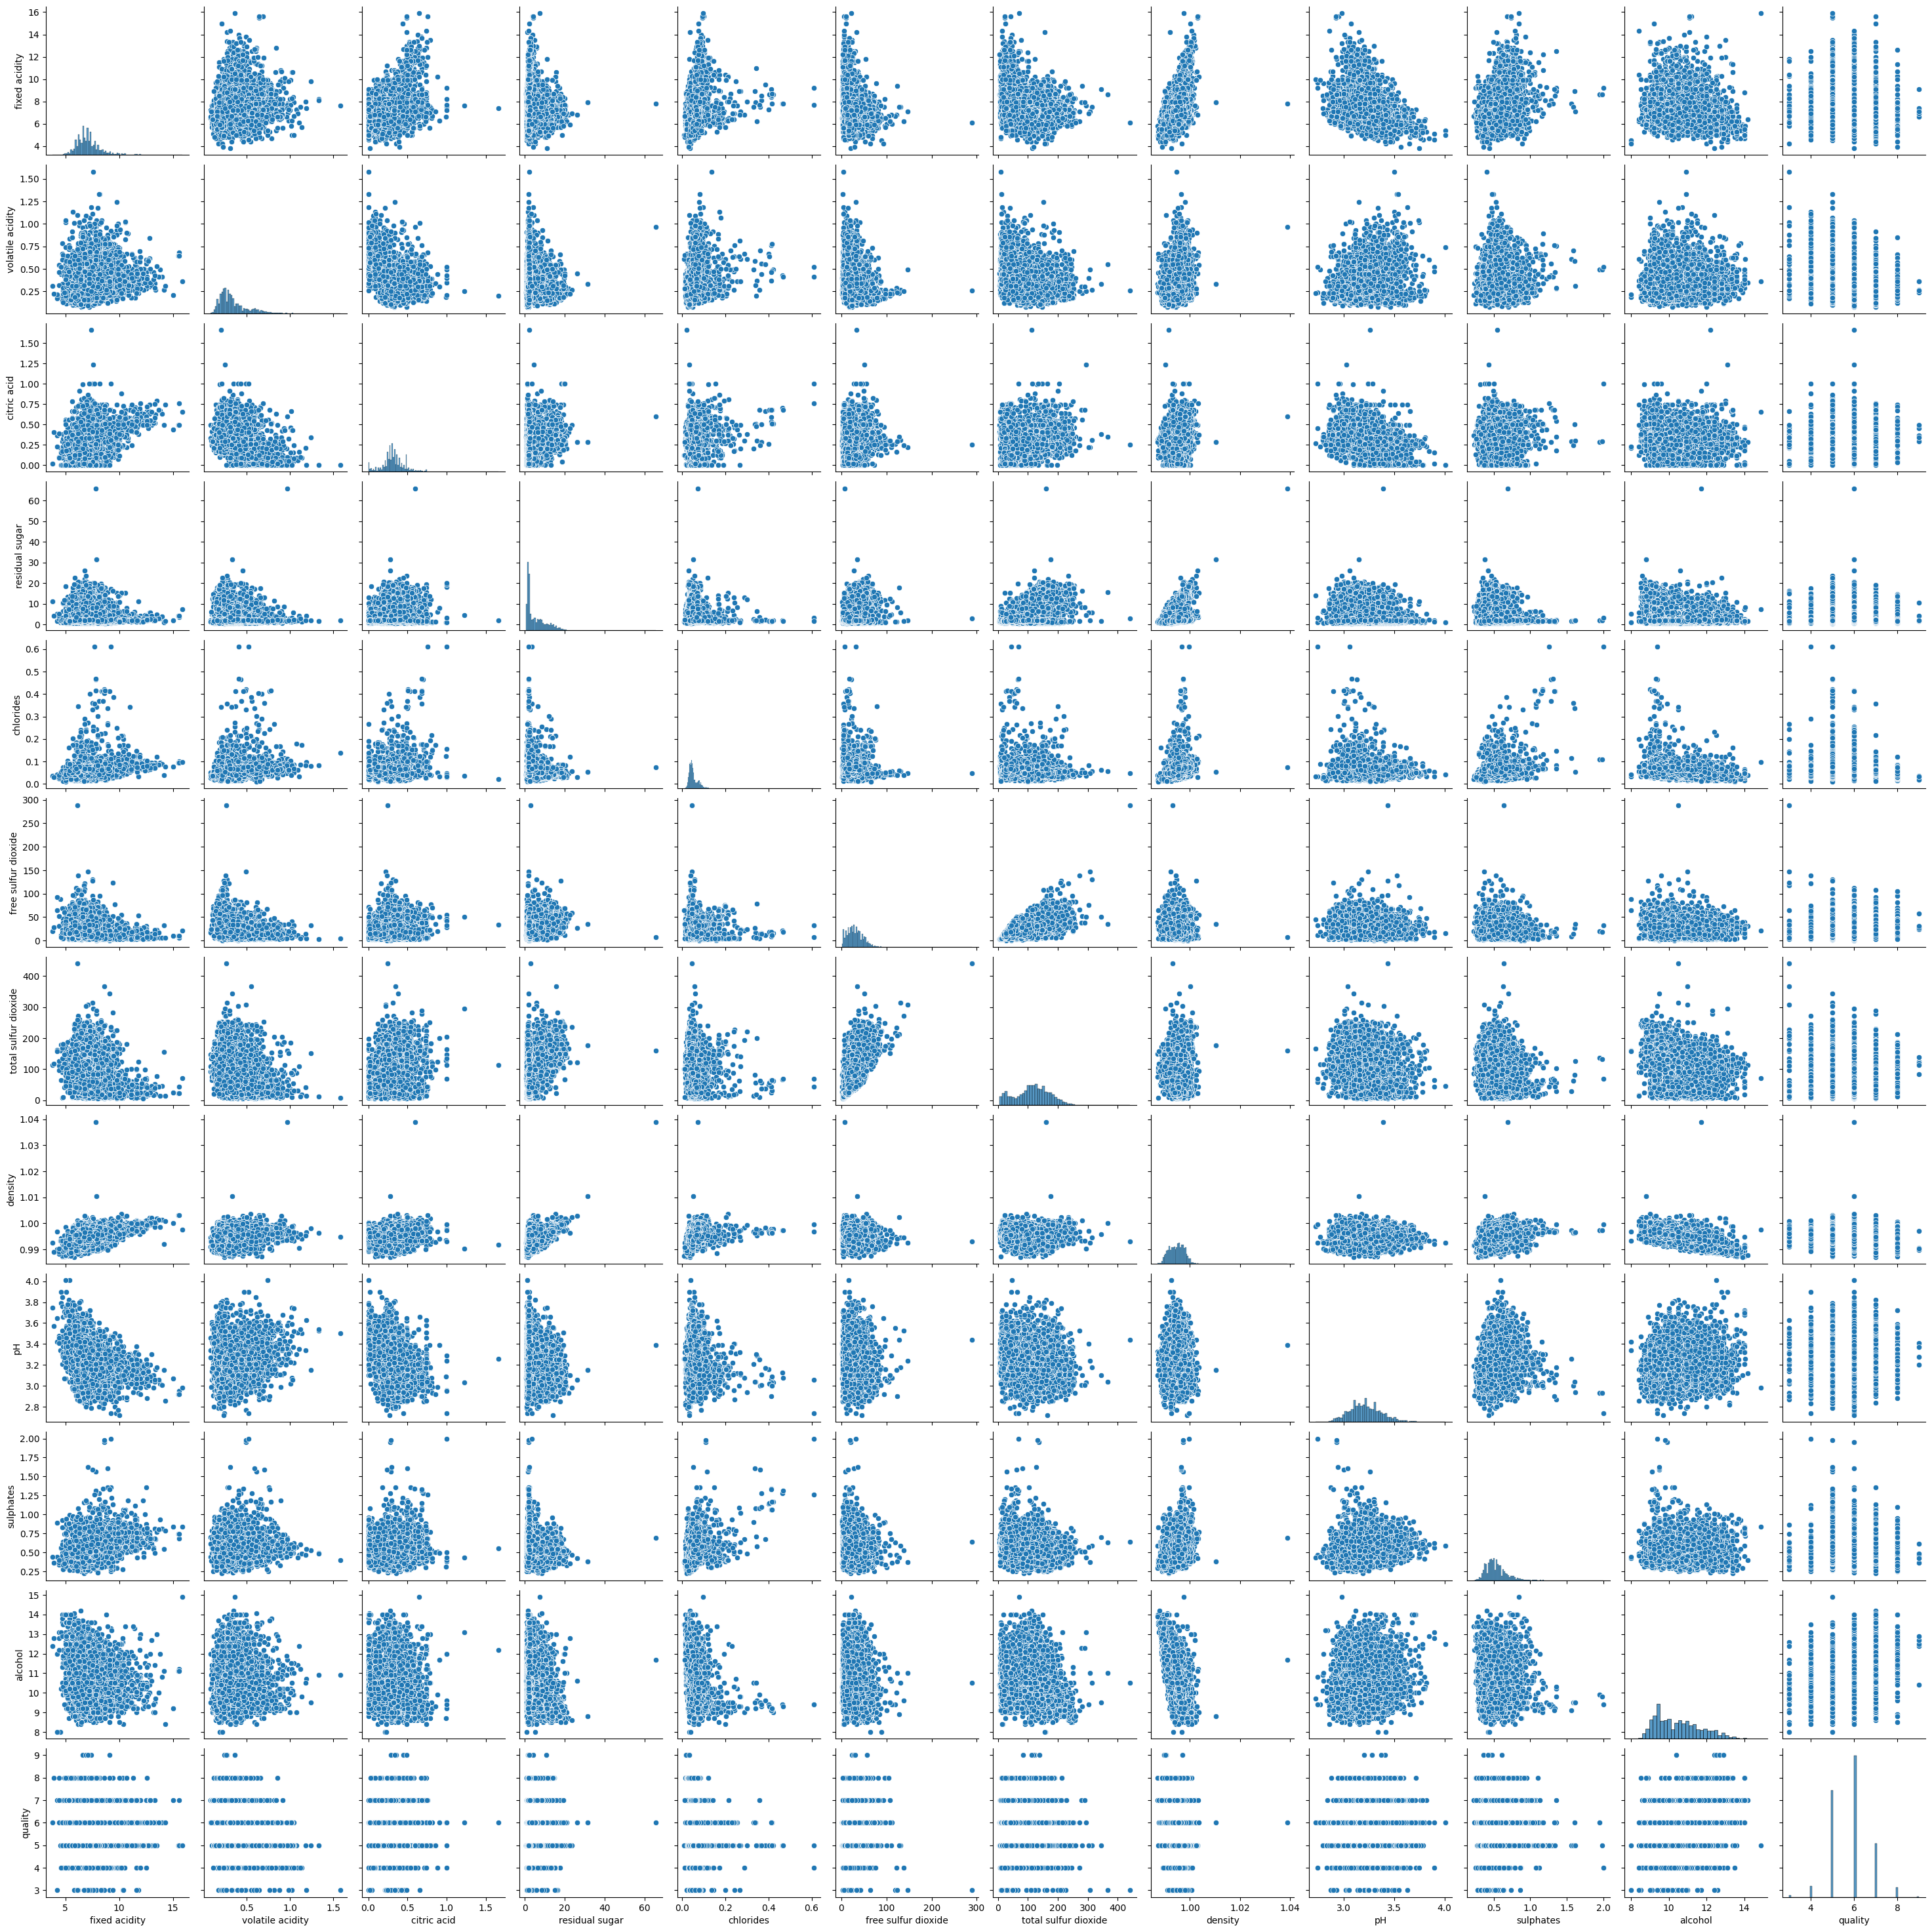

In [76]:
sns.pairplot(df)

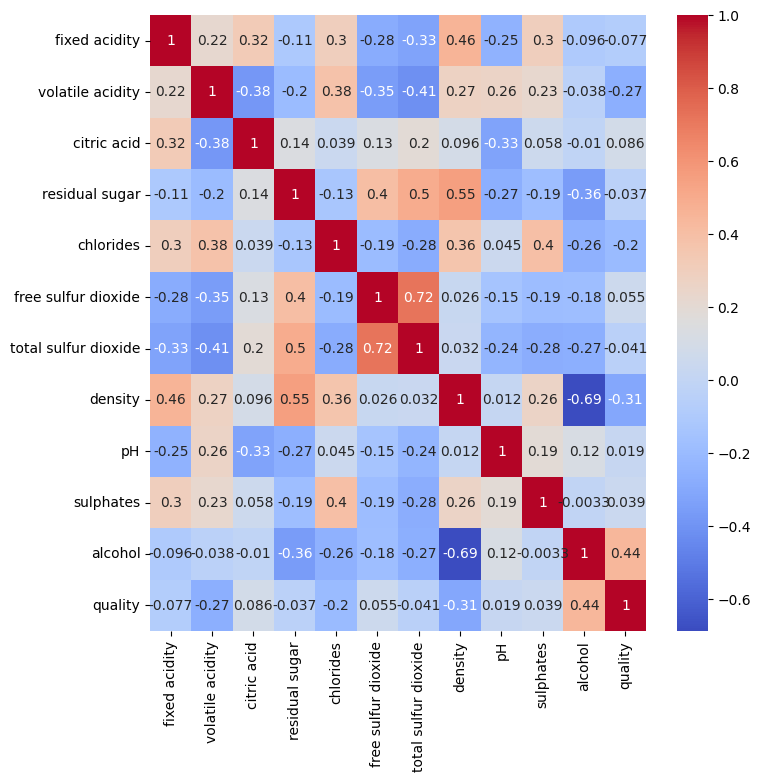

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

In [78]:
df = df.drop('free sulfur dioxide',axis=1)

Next, we'll create a new column called 'best quality' that assigns a value of 1 to wines with a quality score greater than or equal to 7, indicating good quality, and 0 to wines with a score lower than 7, indicating lower quality.

Additionally, we'll convert the 'type' column, which indicates the type of wine, into numerical form.

In [79]:
# Adding a new column 'best quality' based on quality score
df['best_quality'] = [1 if x >= 7 else 0 for x in df.quality]

# Converting 'type' column to numerical format
df.replace({'white': 1, 'red': 0}, inplace=True)

Now segregating features and the target variable from the dataset.

In [80]:
features=df.drop(['quality','best_quality'],axis=1)
target=df['best_quality']

####Data Splitting




In [81]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Spliting the dataset
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=0)

# Checking the shape after spliting
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5197, 11), (1300, 11), (5197,), (1300,))

In [82]:
df['best_quality'].value_counts()

0    5220
1    1277
Name: best_quality, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
X_train

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3761     1            6.1              0.17         0.28             2.5   
3740     1            7.0              0.15         0.28            14.7   
1359     1            6.5              0.19         0.32             1.4   
1230     1            7.3              0.29         0.30            13.0   
4751     1            7.3              0.36         0.62             7.1   
...    ...            ...               ...          ...             ...   
3772     1            6.3              0.24         0.29            13.7   
5191     0            6.9              0.36         0.25             2.4   
5226     0           13.4              0.27         0.62             2.6   
5390     0            8.9              0.40         0.51             2.6   
860      1            8.1              0.27         0.35             1.7   

      chlorides  total sulfur dioxide  density    pH  sulphates  alcohol  
3761      0.028                  98.0  0.99072  3.16       0.37     11.1  
3740      0.051                 149.0  0.99792  2.96       0.39      9.0  
1359      0.040                 132.0  0.99220  3.36       0.54     10.8  
1230      0.043                 238.0  0.99860  3.06       0.41      8.7  
4751      0.033                 185.0  0.99472  3.14       0.62     10.6  
...         ...                   ...      ...   ...        ...      ...  
3772      0.035                 134.0  0.99567  3.17       0.38     10.6  
5191      0.098                  16.0  0.99640  3.41       0.60     10.1  
5226      0.082                  21.0  1.00020  3.16       0.67      9.7  
5390      0.052                  27.0  0.99500  3.32       0.90     13.4  
860       0.030                 103.0  0.99255  3.22       0.63     10.4  

[4547 rows x 11 columns]

In [84]:
y_test

3103    1
1419    1
4761    0
4690    0
4032    0
       ..
4294    0
3757    0
5954    1
4418    0
6182    0
Name: best_quality, Length: 1950, dtype: int64

###Logistic Regression Model :


In [85]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train,y_train)

prediction1 = model1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(prediction1,y_test))

0.8112820512820513


###KNN Model :

In [87]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()

model2.fit(X_train,y_train)

prediction2 = model2.predict(X_test)

In [88]:
print(accuracy_score(prediction2,y_test))

0.8056410256410257


From both the models we can say that logistic regression model has slightly better accuracy compared to KNN model.

